In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np

In [3]:
# Make sure I'm in the right directory for my projects 
os.getcwd()
os.chdir('C:\\Users\\OJ595\\Desktop\\Data Science projects\\Kaggle - Titanic dataset')

In [4]:
# Load the relevant data that I'm going to need for the analysis. This is already split into test and train data. 

test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")
data_explained = pd.read_csv("data dictionary.csv")

In [5]:
# Explaining the variables because they aren't easy to understand just by looking at the title. 

data_explained

Variable                                  Definition  \
0  survival                                    Survival   
1    pclass                                Ticket class   
2       sex                                         Sex   
3       Age                                Age in years   
4     sibsp  # of siblings / spouses aboard the Titanic   
5     parch  # of parents / children aboard the Titanic   
6    ticket                               Ticket number   
7      fare                              Passenger fare   
8     cabin                                Cabin number   
9  embarked                         Port of Embarkation   

                                              Key  
0                                 0 = No, 1 = Yes  
1                       1 = 1st, 2 = 2nd, 3 = 3rd  
2                                             NaN  
3                                             NaN  
4                                             NaN  
5                                             NaN  
6                                             NaN  
7                                             NaN  
8                                             NaN  
9  C = Cherbourg, Q = Queenstown, S = Southampton

Exploratory Data Analysis (rudimentary)

In [6]:
# time to learn more about the data set that we have. 

train_data.describe()
#38% of people survived according to this data set lol 

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
train_data.shape
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
# We have a lot of NaN data but I don't want to fill with 0 because that will affect the mean age. It simply means we likely won't be able to use those as 
# useful prediction metrics 
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Let's put some of this stuff into graphs so we can understand what we're looking at. 

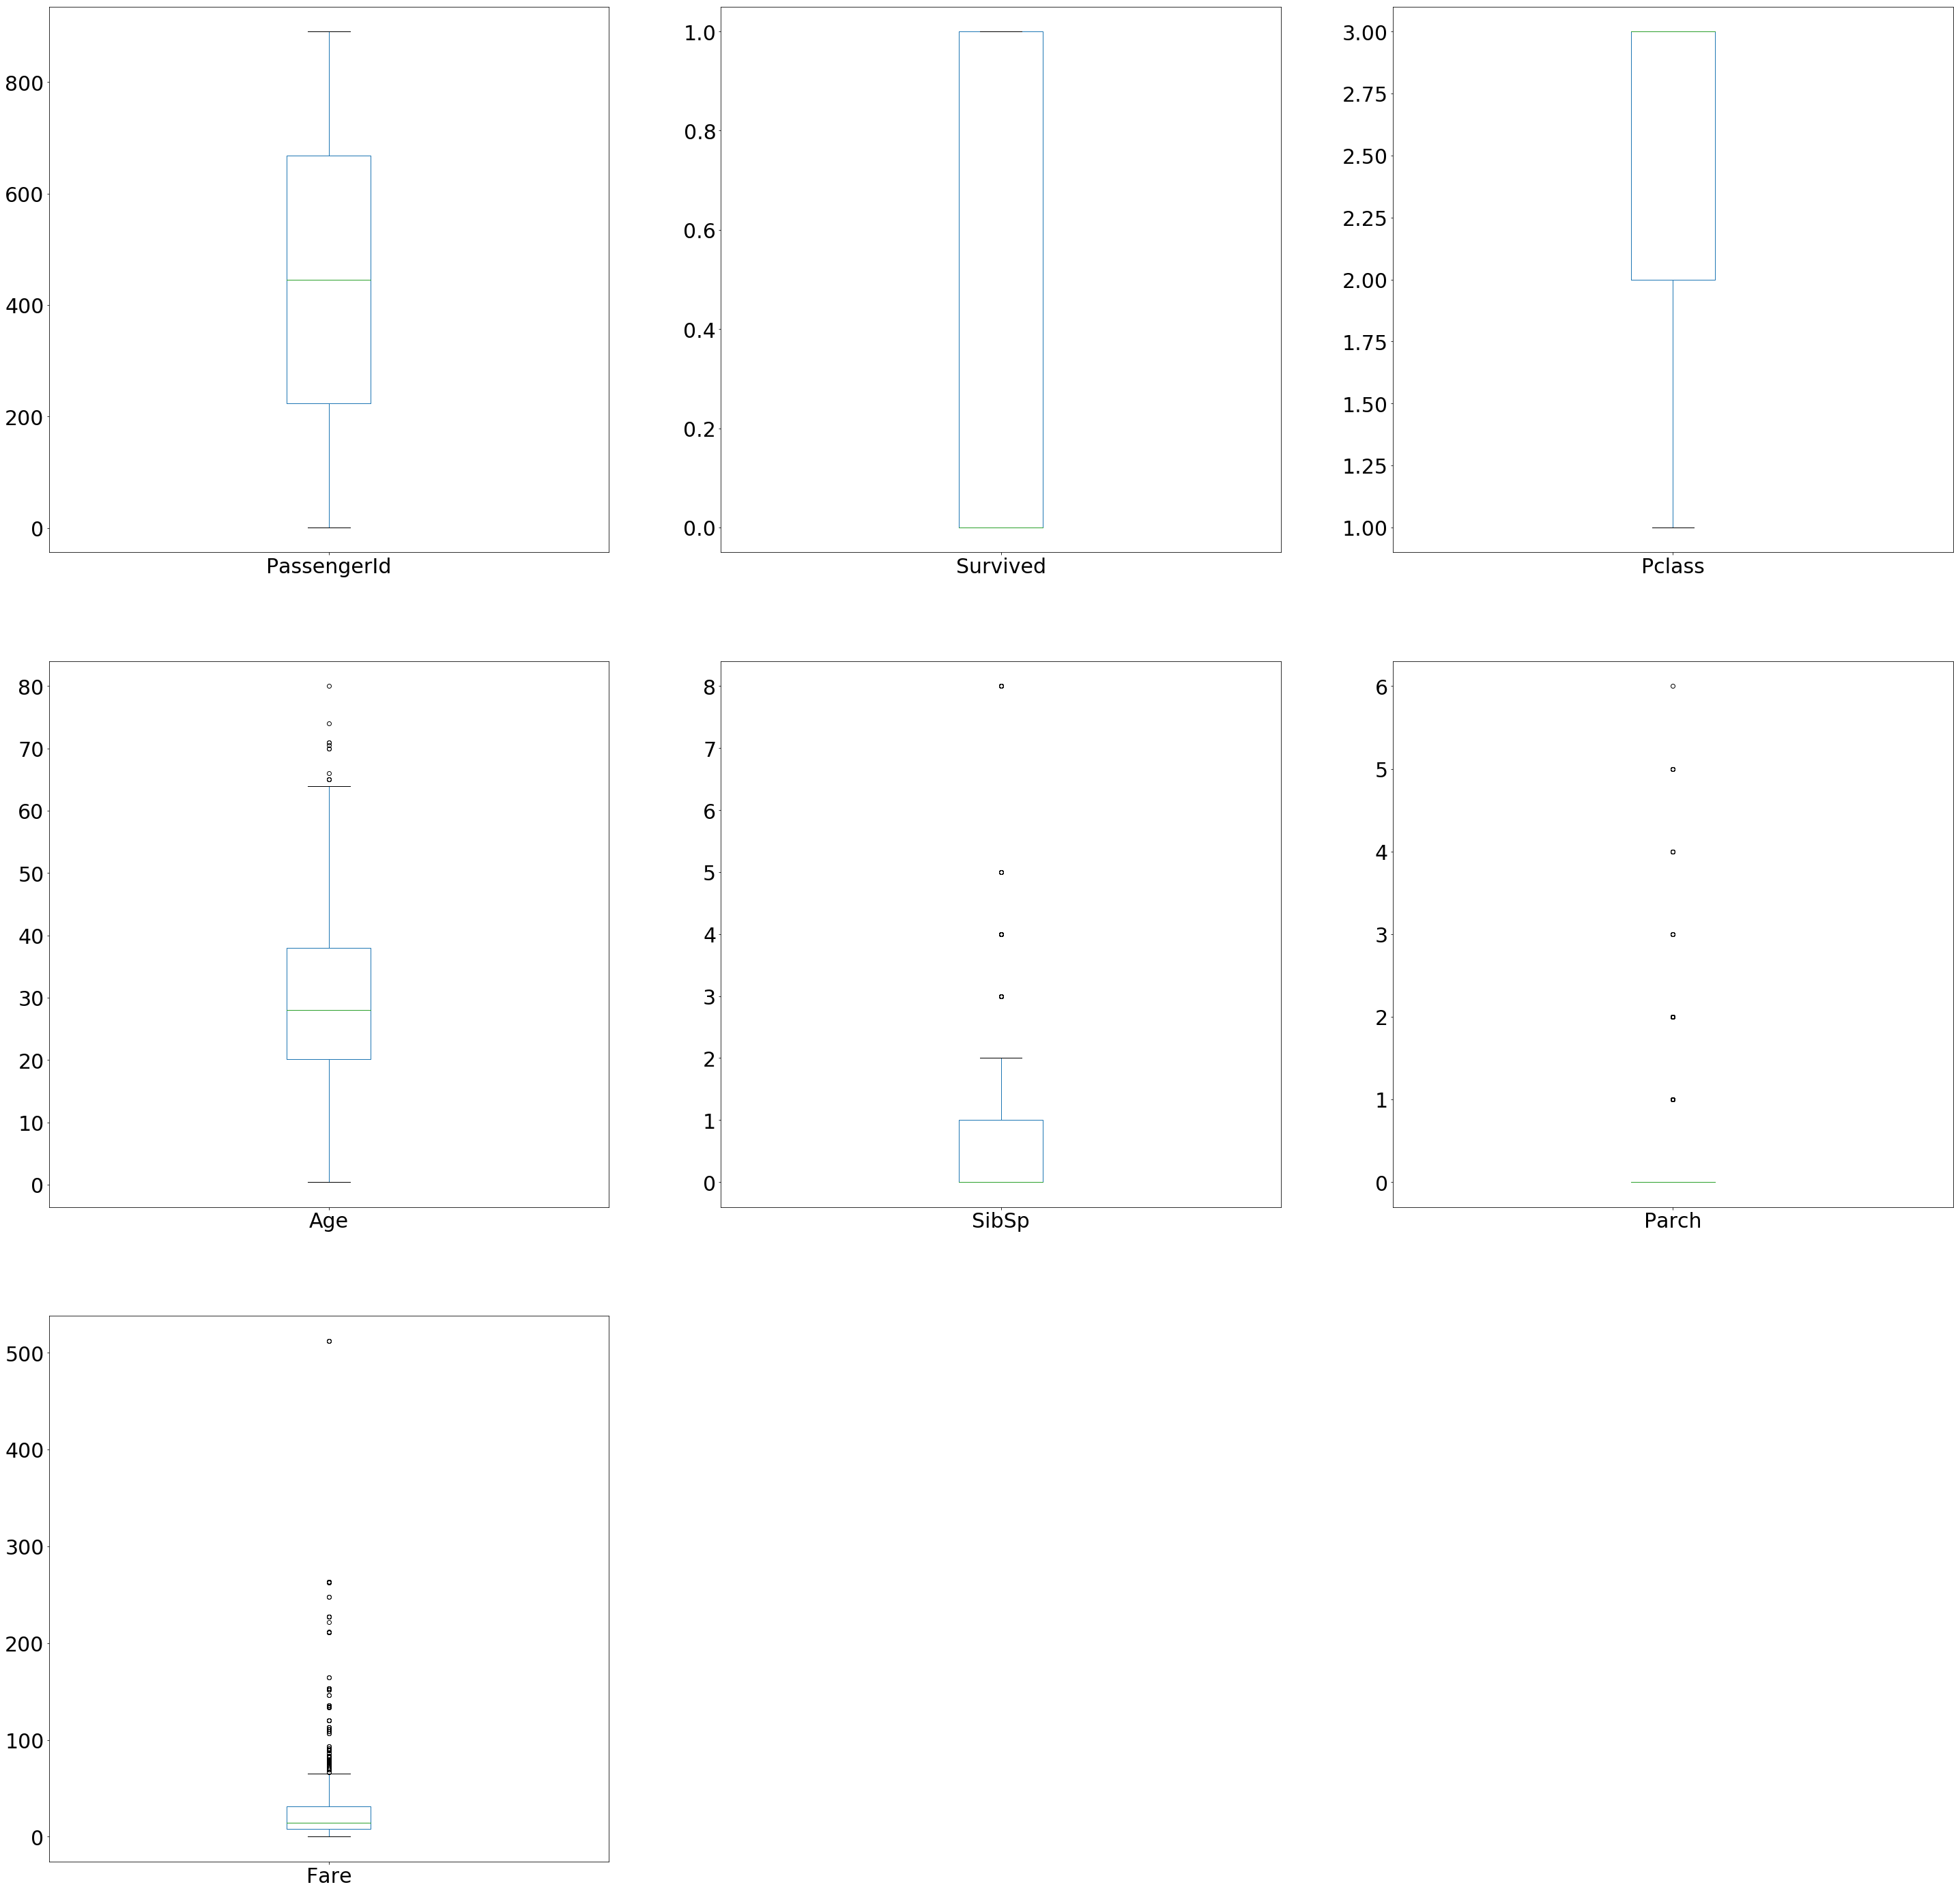

In [10]:
#Box plot
train_data.plot(kind="box", subplots=True, layout=(3,3), figsize=(50,50), sharex=False, sharey=False, fontsize=(30))
plt.savefig("box plot training data.jpg")

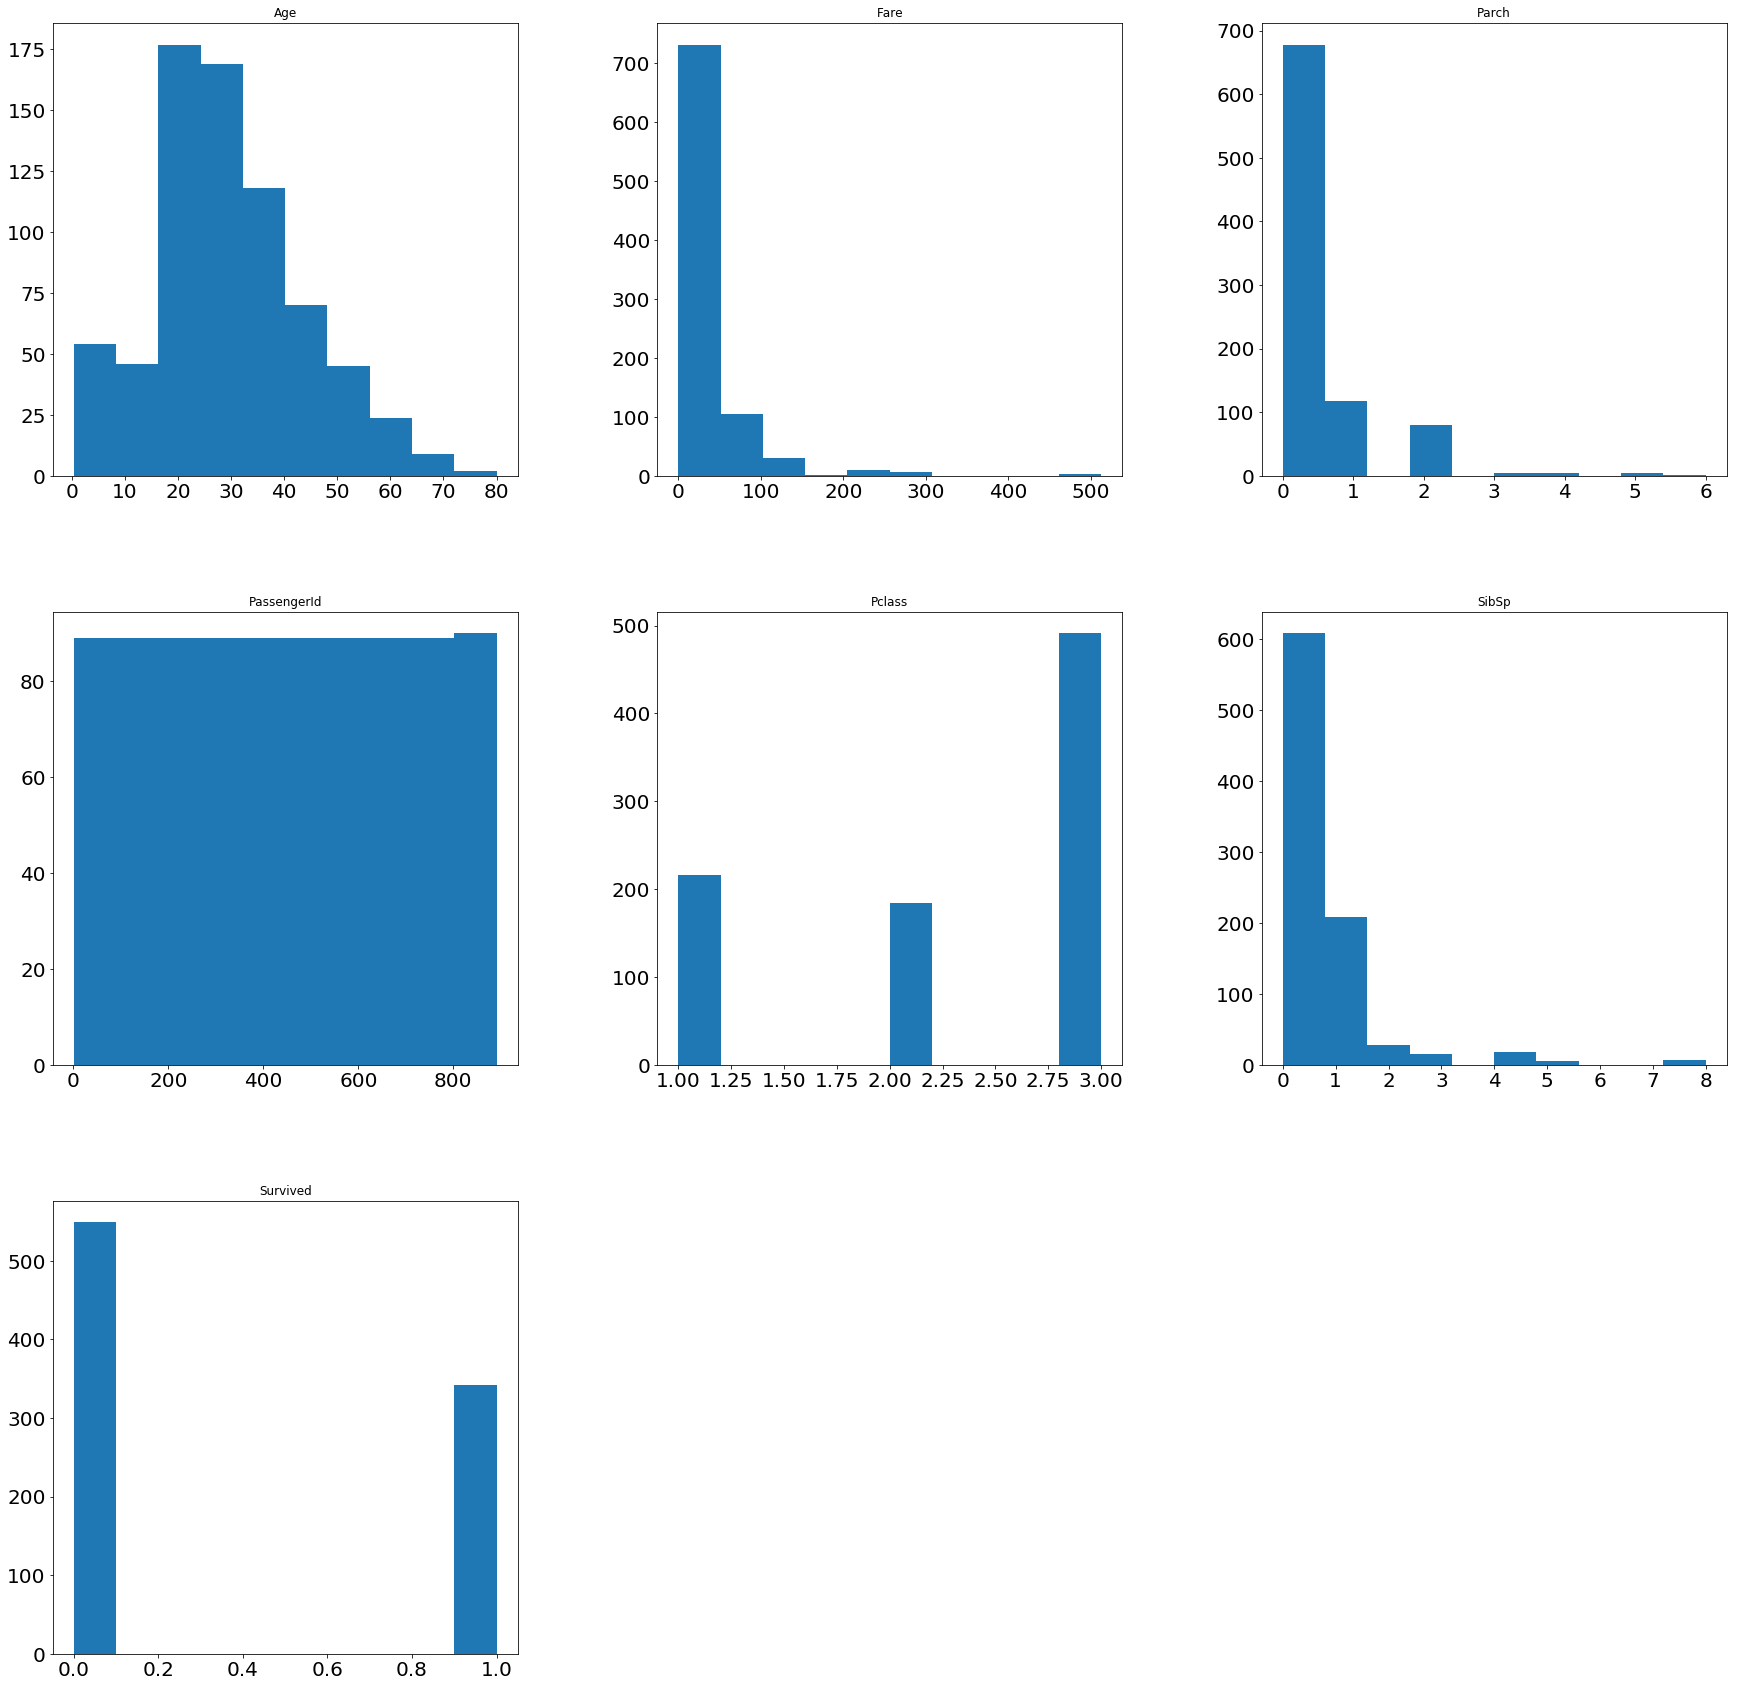

In [11]:
#Histogram
hist_train = train_data.hist(figsize=(30,30), xlabelsize=(20), ylabelsize=(20), grid=False)
plt.savefig("Histogram traning data.jpg")

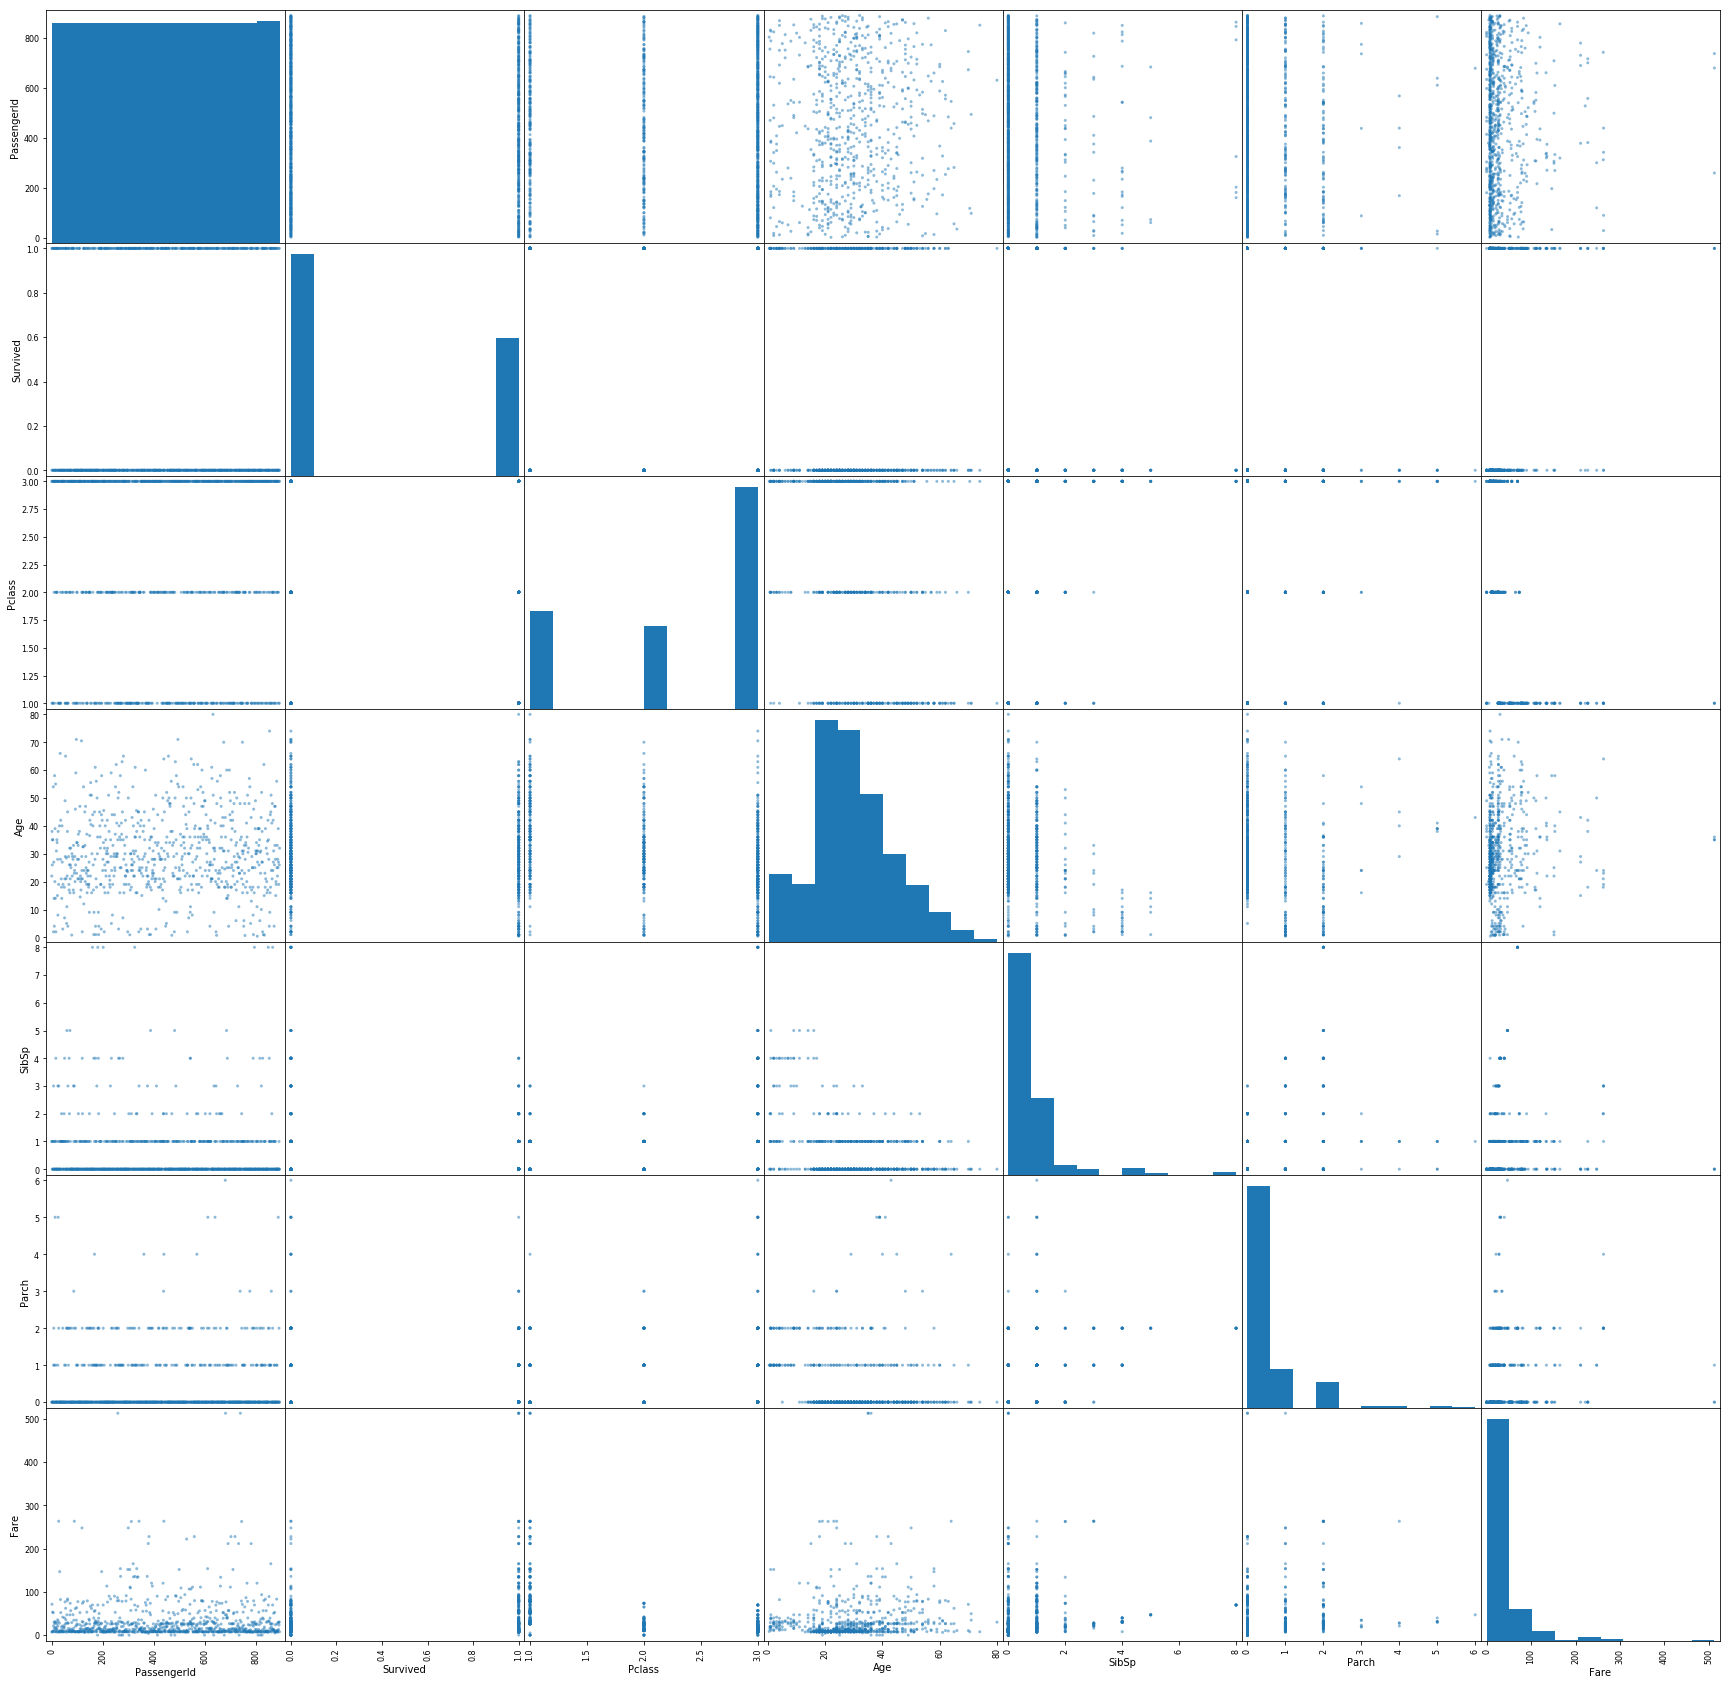

In [12]:
#Comparison of attributes 

scatter_matrix(train_data, figsize=(30,30))
plt.show()

# Not many clear correlations directly from the eye test. 

In [13]:
# Which attributes resulted in survival? 

sex_survive = train_data[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived")
Sib_survive = train_data[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="SibSp", ascending=False)
Parch_survive = train_data[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Parch")

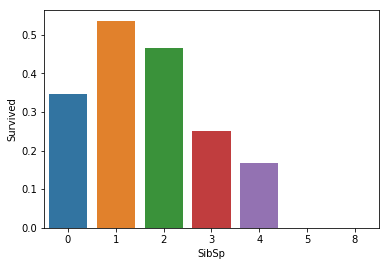

In [14]:
# Sib_survive.plot(x="SibSp", kind="bar")
Sib_fig = sns.barplot(x= Sib_survive["SibSp"], y = Sib_survive["Survived"])
plt.savefig("Siblings vs survival.jpg")
# Sib_survive.savefig("sibling survival.jpg")

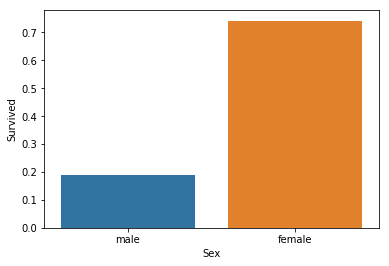

In [15]:
sex_fig = sns.barplot(x=sex_survive["Sex"], y=sex_survive["Survived"])
plt.savefig("Sex and survival.jpg")

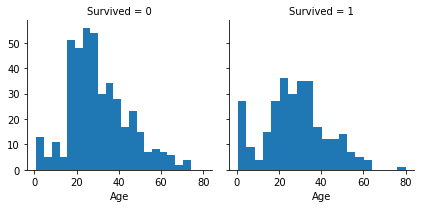

In [16]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.savefig("Age vs survival")

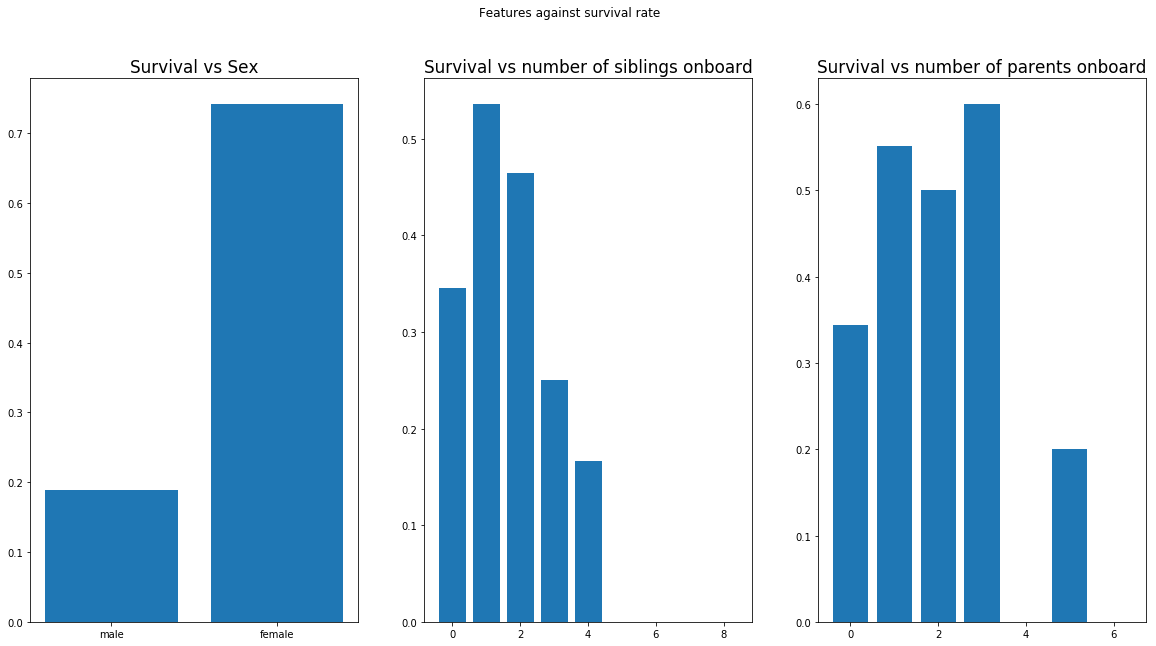

In [17]:
fig, axs = plt.subplots(1,3, figsize=(20,10))
fig.suptitle("Features against survival rate")
plt.rc("font", size=14)
# plt.rc("axes", labelsize=20)
axs[0].bar(x=sex_survive["Sex"], height=sex_survive["Survived"])
axs[0].set_title("Survival vs Sex")
axs[1].bar(x= Sib_survive["SibSp"], height = Sib_survive["Survived"])
axs[1].set_title("Survival vs number of siblings onboard")
axs[2].bar(x=Parch_survive["Parch"], height = Parch_survive["Survived"])
axs[2].set_title("Survival vs number of parents onboard")

plt.savefig("Attributes of survival")
# axs[1,0].plot(g)

C:\Users\OJ595\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\OJ595\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\OJ595\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


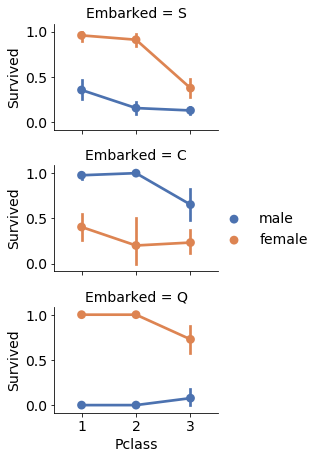

In [18]:
# Do we need to consider the "embarked" column when making a decision about which features to include when making a prediction 
# Looks like I might want to keep it as it looks like there's something about whether you're male or female and the port you got on. 
# Will need to map this to numbers later.

grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
grid.savefig("Survival vs embarkment and gender.jpg", dpi=300)

Cleaning the data for model predictions later 

In [19]:
combined = [train_data, test_data] # This puts both frames into one list so that when we perform cleaning operations it happens to both (where appropriate)

In [20]:
# We don't need the ticket or cabin they were in.

new_train_data = train_data.drop(["Ticket", "Cabin"], axis=1)
new_test_data = test_data.drop(["Ticket", "Cabin"], axis = 1)
new_combined = [new_train_data, new_test_data]

In [21]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [22]:
# Mapping the sex to numbers 

for item in new_combined:
    item.Sex = item.Sex.map({"male":0, "female":1}).astype(int)


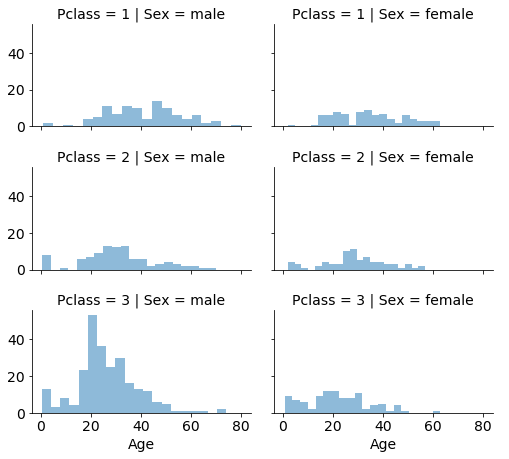

In [23]:
#Filling in the age because we have quite a few NAs

# This shows the sex against the passenger class and the height as a histogram
# The Facetgrid from sns will be useful in the future! 
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()



In [24]:
# We are missing ages so we need to fill them in based on this information. 

'''More accurate way of guessing missing values is to use other correlated features. 
In our case we note correlation among Age, Gender, and Pclass. 
Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. 
So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

From the Kaggle notebook.'''

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
# Some data cleaning and completing - putting things into numbers (where possible)

# Sex is a string that needs to be converted to a number 
# Age contains null values that shouldn't just be dropped 
# Embarked is a string and also contains null values 

# Cleaning the "Sex" column - need to map male and female to 0 and 1 

# for column in X:
#     column["Sex"] = column["Sex"].map( {"male":0, "female":1} ).astype(int)

# Age - how do we handle this one? We can take the average age and fill in the NA values there, generate random values or use "correlated features" to guess the age
# of someone depending on whether they have certain features or not. 
    

In [26]:
# Copied code from kaggle notebook: https://www.kaggle.com/startupsci/titanic-data-science-solutions 
# Do need to understand what is going on here.

for dataset in new_combined:
    for i in range(0, 2): # 0 and 1 in age 
        for j in range(0, 3): # passenger class 1, 2, and 3
            # Creates a new df with guess ages based on the sex and pclass column along with dropping the null columns? 
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()  # p class will equal 1, 2, or 3 (because we've added 1)
                                    # Then dividing sex by pclass?
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
guess_df

1      47.00
4      22.00
6      30.00
8      18.00
18     27.00
19     45.00
32     33.00
37     21.00
49     36.00
63     22.00
66     18.00
70     24.00
72     29.00
79     24.00
86     27.00
87     18.00
90     22.00
98     20.00
104    16.00
113    18.50
117     1.00
125    17.00
138    23.00
140    10.00
153    36.00
157    23.00
159    26.00
165    26.00
169    22.00
197    18.00
206    35.00
214    38.00
263     1.00
280    23.00
283     9.00
284     2.00
291    30.00
309    45.00
313    37.00
315    17.00
333    19.00
345    16.00
347    38.00
354     0.17
359    30.00
367    22.00
376    22.00
383    19.00
409     3.00
412    28.00
Name: Age, dtype: float64

In [27]:
# This creates a new column called "title". It works by using the str.extract feature which takes out information based on a certain pattern. 
# In this case, it creates a new column based on a string that has capital letter then a lowercase followed by any character (that's the '.' I think)

for dataset in new_combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(new_train_data['Title'], new_train_data['Sex']) #similar to a pivot table. Counts the number of males and females with a certain title. 

Sex         0    1
Title             
Capt        1    0
Col         2    0
Countess    0    1
Don         1    0
Dr          6    1
Jonkheer    1    0
Lady        0    1
Major       2    0
Master     40    0
Miss        0  182
Mlle        0    2
Mme         0    1
Mr        517    0
Mrs         0  125
Ms          0    1
Rev         6    0
Sir         1    0

In [28]:
for dataset in new_combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare') # Replaces weird titles with "rare"

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
new_train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() # Now we can see who has survived based on their title (maybe some people got more 
#privilege?)

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [29]:
# We'll also need to map these to numbers as well so that we can model them appropriately. 

title_dict = {"Master": 1, "Miss": 2, "Mr": 3, "Mrs": 4, "Rare":5} #If I use a range, remember to +1 it 

for dataset in new_combined: 
    dataset.Title = dataset.Title.map(title_dict).astype(int)

In [30]:
new_train_data.drop(["Name"], axis=1,inplace=True)

In [31]:
new_test_data.drop(["Name"], axis=1,inplace=True)

In [32]:
new_train_data.sample(5)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch      Fare Embarked  \
77            78         0       3    0   25      0      0    8.0500        S   
621          622         1       1    0   42      1      0   52.5542        S   
252          253         0       1    0   62      0      0   26.5500        S   
530          531         1       2    1    2      1      1   26.0000        S   
319          320         1       1    1   40      1      1  134.5000        C   

     Title  
77       3  
621      3  
252      3  
530      2  
319      4

In [33]:
# We're messing up on the band feature. Let's create a copy that we can use to play around with.

test = new_train_data.copy()
test["Age Band"] = pd.cut(test.Age, 5)
test[["Survived", "Age Band"]].groupby(["Age Band"], as_index=False).mean().sort_values(by="Age Band", ascending = True)

Age Band  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

In [34]:
df_w_ages = test.copy()

In [35]:
# Time to create age bands that seem to have similar survival rates. this might make the prediction slightly easier. 
# It's possible to do this by using pd.cut which cuts groups of however much you specify. Let's create a new column for this. 

new_train_data["Age Band"] = pd.cut(new_train_data["Age"], 5)

# We can also put it into a table 

new_train_data[["Survived", "Age Band"]].groupby(["Age Band"], as_index=False).mean().sort_values(by="Age Band", ascending=True)

Age Band  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

In [36]:
for dataset in new_combined:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [37]:
new_train_data

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch      Fare Embarked  \
0              1         0       3    0    1      1      0    7.2500        S   
1              2         1       1    1    2      1      0   71.2833        C   
2              3         1       3    1    1      0      0    7.9250        S   
3              4         1       1    1    2      1      0   53.1000        S   
4              5         0       3    0    2      0      0    8.0500        S   
5              6         0       3    0    1      0      0    8.4583        Q   
6              7         0       1    0    3      0      0   51.8625        S   
7              8         0       3    0    0      3      1   21.0750        S   
8              9         1       3    1    1      0      2   11.1333        S   
9             10         1       2    1    0      1      0   30.0708        C   
10            11         1       3    1    0      1      1   16.7000        S   
11            12         1       1    1    3      0      0   26.5500        S   
12            13         0       3    0    1      0      0    8.0500        S   
13            14         0       3    0    2      1      5   31.2750        S   
14            15         0       3    1    0      0      0    7.8542        S   
15            16         1       2    1    3      0      0   16.0000        S   
16            17         0       3    0    0      4      1   29.1250        Q   
17            18         1       2    0    1      0      0   13.0000        S   
18            19         0       3    1    1      1      0   18.0000        S   
19            20         1       3    1    1      0      0    7.2250        C   
20            21         0       2    0    2      0      0   26.0000        S   
21            22         1       2    0    2      0      0   13.0000        S   
22            23         1       3    1    0      0      0    8.0292        Q   
23            24         1       1    0    1      0      0   35.5000        S   
24            25         0       3    1    0      3      1   21.0750        S   
25            26         1       3    1    2      1      5   31.3875        S   
26            27         0       3    0    1      0      0    7.2250        C   
27            28         0       1    0    1      3      2  263.0000        S   
28            29         1       3    1    1      0      0    7.8792        Q   
29            30         0       3    0    1      0      0    7.8958        S   
..           ...       ...     ...  ...  ...    ...    ...       ...      ...   
861          862         0       2    0    1      1      0   11.5000        S   
862          863         1       1    1    2      0      0   25.9292        S   
863          864         0       3    1    1      8      2   69.5500        S   
864          865         0       2    0    1      0      0   13.0000        S   
865          866         1       2    1    2      0      0   13.0000        S   
866          867         1       2    1    1      1      0   13.8583        C   
867          868         0       1    0    1      0      0   50.4958        S   
868          869         0       3    0    1      0      0    9.5000        S   
869          870         1       3    0    0      1      1   11.1333        S   
870          871         0       3    0    1      0      0    7.8958        S   
871          872         1       1    1    2      1      1   52.5542        S   
872          873         0       1    0    2      0      0    5.0000        S   
873          874         0       3    0    2      0      0    9.0000        S   
874          875         1       2    1    1      1      0   24.0000        C   
875          876         1       3    1    0      0      0    7.2250        C   
876          877         0       3    0    1      0      0    9.8458        S   
877          878         0       3    0    1      0      0    7.8958        S   
878          879         0       3  

In [38]:
# Also need to do the same thing for the fare because the logic makes sense. I can't predict anything if all of the fares are different.

new_train_data["Fare"]
new_train_data["Fare Band"] = pd.qcut(new_train_data["Fare"], 4) # puts everything in to an *equal* number of categories. 

new_train_data[["Survived", "Fare Band"]].groupby(["Fare Band"], as_index=False).mean().sort_values(by="Fare Band", ascending=True)

Fare Band  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [39]:
# Create fare band...

for dataset in new_combined:    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.4), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.4) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31.0), 'Fare'] = 3
    


In [40]:
# Copies the data frame with the age bands so that we have it for reference (Should we need it)
# Drops the fare and age band from the training data set we are using because we won't need it when making predictions 
new_train_copy = new_train_data.copy()
new_train_data.drop(["Fare Band", "Age Band"], axis=1,inplace=True)


In [41]:
# Also drops the passenger ID because we don't need that either. 

new_train_data.drop(["PassengerId"], axis=1,inplace=True)

In [42]:
# Need to fill in the embarked column with something - since it's only two missing, I'll fill it in with the sum

most_frequent = new_train_data.Embarked.mode()[0]
new_train_data.Embarked.fillna(most_frequent,inplace=True)

#now to do it for both train and test data

for dataset in new_combined:
    dataset.Embarked = dataset.Embarked.fillna(most_frequent)
    
new_train_data[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Embarked", ascending=True)

# People who got on at C seemed to have a better survival rate - no idea why though. 

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

In [43]:
# Mapping embarked to numbers lol 

for dataset in new_combined: 
    dataset.Embarked = dataset.Embarked.map({"S":1, "Q":2, "C":3})
    
new_train_data.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0         0       3    0    1      1      0   0.0         1      3
1         1       1    1    2      1      0   3.0         3      4
2         1       3    1    1      0      0   1.0         1      2
3         1       1    1    2      1      0   3.0         1      4
4         0       3    0    2      0      0   1.0         1      3

In [44]:
new_train_data.Fare.isna().sum()

0

Predictions using a variety of models 

In [45]:
# prediction target is "y"
# Features we'll use for training is X

y = new_train_data.Survived
X = new_train_data

# Split the training data into test and train 
#randomstate = 0 means we're using the same splits all the time. 

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0) #this randomly splits the data across the 4 variables that I've specified. Random state 0 
# means that they get the same data each time it's run. 

In [46]:
# Define the algorithms that we're going to use 

models = []

#Linear models 
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))

#Non linear models
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Testing whether they are accurate or not. 
# We can do this using mean absolute error or k-test split. The following code using k-test and evaluates each one in order

results = []
names = []


for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    # This tests each model and tests them accoring to the model chosen, the training data, the target variable, the cross validation score and the scoring method
	cv_results = cross_val_score(model, train_X.drop(["Survived"],axis=1), train_y, cv=kfold, scoring='accuracy')
    
    #Adds these results to a list
	results.append(cv_results)
    
    #Adds the name to a list so that when we check it, we'll have the name next to the score we have for the model. 
	names.append(name)
    
	print(f'{name}: {cv_results.mean()}, ({cv_results.std()})')



LR: 0.7949118046132971, (0.04335685081980454)
LDA: 0.7950022614201718, (0.033705214033268364)
KNN: 0.8218453188602443, (0.042103101082634826)
CART: 0.7919267299864315, (0.04135623109823397)
NB: 0.7933288104929896, (0.04843288919659086)
SVM: 0.8352781546811399, (0.04026537202928938)


In [47]:
new_test_data.head()
test_X = new_test_data.copy()
test_X.Fare.fillna(test_X.Fare.mean(), inplace=True)
test_X.shape

(418, 9)

In [48]:
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((668, 9), (223, 9), (668,), (223,))

In [50]:
# Now we can put that against the test data using an accurate model.

# better than 37% 
# lr = LogisticRegression(solver='liblinear', multi_class='ovr')
# lr.fit(train_X, train_y)
# Y_prediction = lr.predict(test_X)
# lr.score(train_X, train_y)

# Similar accuracy to LR
KNN = KNeighborsClassifier()
KNN.fit(train_X, train_y)
Y_prediction = KNN.predict(test_X)

In [51]:
#Most accurate so far.

SVM = SVC(gamma='auto')
# SVM.fit(train_X, train_y)
SVM.fit(train_X.drop(["Survived"],axis=1), train_y)
Y_prediction = SVM.predict(test_X.drop(["PassengerId"], axis=1))
acc_log = round(SVM.score(train_X.drop(["Survived"],axis=1), train_y) * 100, 2)
acc_log

83.98

In [53]:
train_X.shape, train_y.shape, val_X.shape, val_y.shape

((668, 9), (668,), (223, 9), (223,))

In [54]:
submission = pd.DataFrame({
        "PassengerId": new_test_data["PassengerId"],
        "Survived": Y_prediction})

submission.to_csv("Kaggle - Titanic submission attempt 5", index=False)

In [55]:
new_test_data.shape, Y_prediction.shape

((418, 9), (418,))

In [57]:
submission["Survived"].value_counts()

0    257
1    161
Name: Survived, dtype: int64